In [8]:
#new import statsmodels
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Math
import math
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Machine learning imports
from sklearn.linear_model import LogisticRegression
# cross_validation now called model_selection
from sklearn.model_selection import train_test_split
# For evaluating our ML results
from sklearn import metrics
# Dataset import
import statsmodels.api as sm

### Part 1: Basic Mathematical Overview
 
First, let's take a look at the [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function). The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined as:
 $$ \sigma (t)= \frac{1}{1+e^{-t}}$$

In [ ]:
# A graph of the logistic function looks like this (following code):

# In[224]:


# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

 If we remember back to the Linear Regression Lectures, we could describe a [Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) Function model as:
 $$ y_i = \beta _1 x_{i1} + ... + \beta _i x_{ip}$$
 
Which was basically an expanded linear equation (y=mx+b) for various x data features. In the case of the above equation, we presume a data set of 'n' number of units, so that the data set would have the form:
 $$ [ y_i, x_{i1},...,x_{ip}]^{n}_{i=1}$$

For our logistic function, if we view *t* as a linear function with a variable *x* we could express t as:
 $$ t = \beta _0 + \beta _1 x $$

Here, we've basically just substituted a linear function (form similar to y=mx+b) for t. We could then rewrite our logistic function equation as:
 $$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$

Now we can interpret F(x) as the probability that the dependent variable is a "success" case, this is a similar style of thinking as in the Binomial Distribution, in which we had successes and failures. So the formula for F(x) that we have here states that the probability of the dependent variable equaling a "success" case is equal to the value of the logistic function of the linear regression expression (the linear equation we used to replace *t* ).
 
Inputting the linear regression expression into the logistic function allows us to have a linear regression expression value that can vary from positive to negative infinity, but after the transformation due to the logistic expression we will have an output of F(x) that ranges from 0 to 1.
 
We can now perform a binary classification based on where F(x) lies, either from 0 to 0.5, or 0.5 to 1. 
 
### Part 2: Extra Math Resources
 
This is a very basic overview of binary classification using Logistic Regression, if you're still interested in a deeper dive into the mathematics, check out these sources:
 
1.) [Andrew Ng's class notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) on Logistic Regression (Note: Scroll down) 
 
2.) [CMU notes](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf) Note: Advanced math notation.
 
3.) [Wikipedia](http://en.wikipedia.org/wiki/Logistic_regression) has a very extensive look at logistic regression.
 
Scroll down to the bottom for more resources similar to this lecture!

-----------
### Part 3: Dataset Analysis
Let us go ahead and take a look at the [dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html)
 
The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs. The published work on the data set can be found in:
 
[Fair, Ray. 1978. “A Theory of Extramarital Affairs,” `Journal of Political Economy`, February, 45-61.](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf)
 
It is important to note that this data comes from a self-reported survey, which can have many issues as far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women or marriage, the data is just interesting but its accuracy should be met with a healthy dose of skepticism.
 
We'll ignore those issues concerning the data and just worry about the logistic regression aspects to the data.

In this case we will approach this as a classification problem by asking the question:
 
*Given certain variables for each woman, can we classify them as either having particpated in an affair, or not participated in an affair?* 
 
#### DataSet Description
 
From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:
 
     rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                     4 = good, 5 = very good
     age             : Age
     yrs_married     : No. years married. Interval approximations. See
                     original paper for detailed explanation.
     children        : No. children
     religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                     4 = strongly
     educ            : Level of education, 9 = grade school, 12 = high
                     school, 14 = some college, 16 = college graduate,
                     17 = some graduate school, 20 = advanced degree
     occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                     or unskilled worker; 3 = white-colloar; 4 = teacher
                     counselor social worker, nurse; artist, writers;
                     technician, skilled worker, 5 = managerial,
                     administrative, business, 6 = professional with
                     advanced degree
     occupation_husb : Husband's occupation. Same as occupation.
     affairs         : measure of time spent in extramarital affairs
 
See the original paper for more details.
 
*Why a Statsmodels data set?* So you can have the option of working through additional example datasets included in SciKit Learn and their own tutorials.

 ------------
### Part 4: Data Visualization

Now that we've done a quick overview of some math and the data we will be working with, let's go ahead and dive into the code!
 
We will start with loading the data and visualizing it. 

In [13]:
df = sm.datasets.fair.load_pandas().data

In [14]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Start our classfication by creating a new column called 'Had_Affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [15]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
# Apply the function defining if there was an affair
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [16]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [17]:
df.groupby('Had_Affair').mean()
# Notice that women who had affairs were slightly older, were married longer, but since the other avg's were fairly close we can't rush to conclusions

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


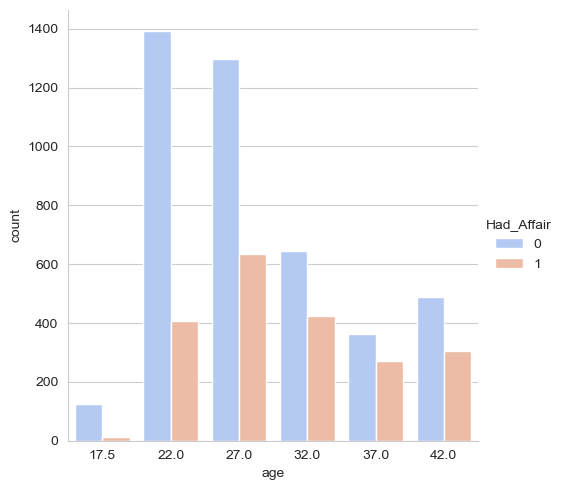

In [23]:
# Visualize using seaborn
sns.catplot(x='age', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

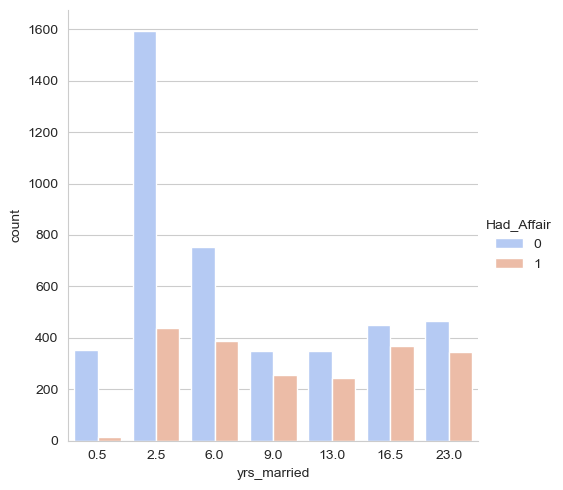

In [24]:
sns.catplot(x='yrs_married', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

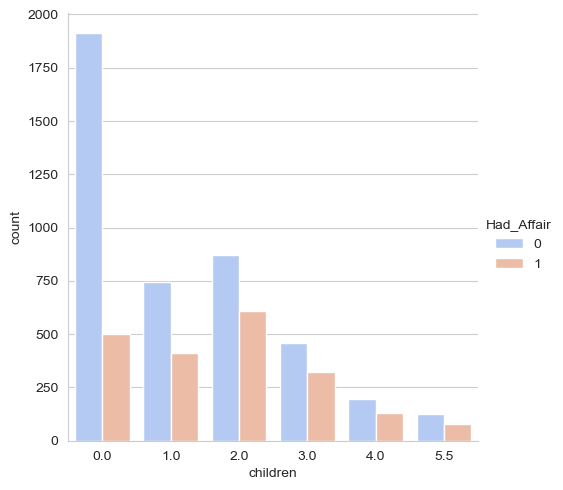

In [25]:
sns.catplot(x='children', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

sns.catplot(x='educ', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

### Part 5:  Data Preparation
 
If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as *Categorical Variables*. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29) and creating new columns from them.

In [27]:
# Create new dataframes for the categorical variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [28]:
occ_dummies.head()
# Creates a column for each value in occupation, since they are different 'categories' and assigned a bool value if they are or are not in that category

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [29]:
# Create column names for dummies
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [30]:
# NOW CREATE THE X AND Y DATASETS FOR LOGISTIC REGRESSION
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [31]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)
X = pd.concat([X, dummies], axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [32]:
Y = df.Had_Affair

### Part 6: Multicollinearity Consideration.

Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid [multicollinearity](http://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity). Multicollinearity occurs due to the [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_(statistics)) we created. This is because the dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.

' That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others. ' 

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.


In [33]:
# Dropping one column from each dummy variable set to avoid multicollinearity
X = X.drop('occ1', axis=1)
X = X.drop('hocc1', axis=1)

# Drop affairs column so target Y (Had_Affair) makes sense
X = X.drop('affairs', axis=1)

In [34]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the [null error rate](http://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

In [35]:
Y.head()
# Must be set to a 1-D array to use with scikit learn (np.ravel)

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [36]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Part 7: Logistic Regression with SciKit Learn

Now let's go ahead and run the logistic regression. This is a very similar process to the Linear Regression from the previous lecture. We'll create the model, the fit the data into the model, and check our accuracy score. Then we'll split the data into testing and training sets and see if our results improve.
 
Let's start by initiating the model!

In [39]:
log_model = LogisticRegression(max_iter = 1000)

log_model.fit(X,Y)

log_model.score(X,Y)

0.726358781024191

In [40]:
# Check the percentage of women that had an affair
Y.mean()    

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.

In [42]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df
# Positive coefficient means an increase in a likelihood of an affair, Negative means decrease

,0,1
0,rate_marriage,[-0.7089047167467882]
1,age,[-0.060708647040021865]
2,yrs_married,[0.10757479529135035]
3,children,[0.015765058631612566]
4,religious,[-0.37377136246659476]
5,educ,[-0.0010556319519447461]
6,occ2,[0.06091044357186966]
7,occ3,[0.3713798433536075]
8,occ4,[0.13718480259099244]
9,occ5,[0.7180386098842448]


As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair.

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student).



### Part 8: Testing and Training Data Sets
 
Just like we did in the Linear Regression Lecture, we should be splitting our data into training and testing data sets. We'll follow a very similar procedure to the Linear Regression Lecture by using SciKit Learn's built-in train_test_split method.

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [45]:
log_model2 = LogisticRegression(max_iter = 1000)
log_model2.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [46]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

In [48]:
# Input the testing set first and compare it to the predictions (comparing the training set to the testing set)
print(metrics.accuracy_score(Y_test, class_predict))

0.739321608040201


Now we have a 73.93% accuracy score, which is basically the same as our previous accuracy score, 72.63%.

### Part 9:  Conclusion and more Resources

So what could we do to try to further improve our Logistic Regression model? We could try some [regularization techniques](http://en.wikipedia.org/wiki/Regularization_%28mathematics%29#Regularization_in_statistics_and_machine_learning) or using a non-linear model.
 
I'll leave the Logistic Regression topic here for you to explore more possibilites on your own. Here are several more resources and tutorials with other data sets to explore:
 
1.) Here's another great post on how to do logistic regression analysis using Statsmodels from [yhat](http://blog.yhathq.com/posts/logistic-regression-and-python.html)!
 
2.) The SciKit learn Documentation includes several [examples](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) at the bottom of the page.
 
3.) DataRobot has a great overview of [Logistic Regression](http://www.datarobot.com/blog/classification-with-scikit-learn/)
 
4.) Fantastic resource from [aimotion.blogspot](http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html) on the Logistic Regression and the Mathmatics of how it relates to the cost function and gradient!